In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [86]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [87]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [89]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [90]:
df.shape

(891, 12)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

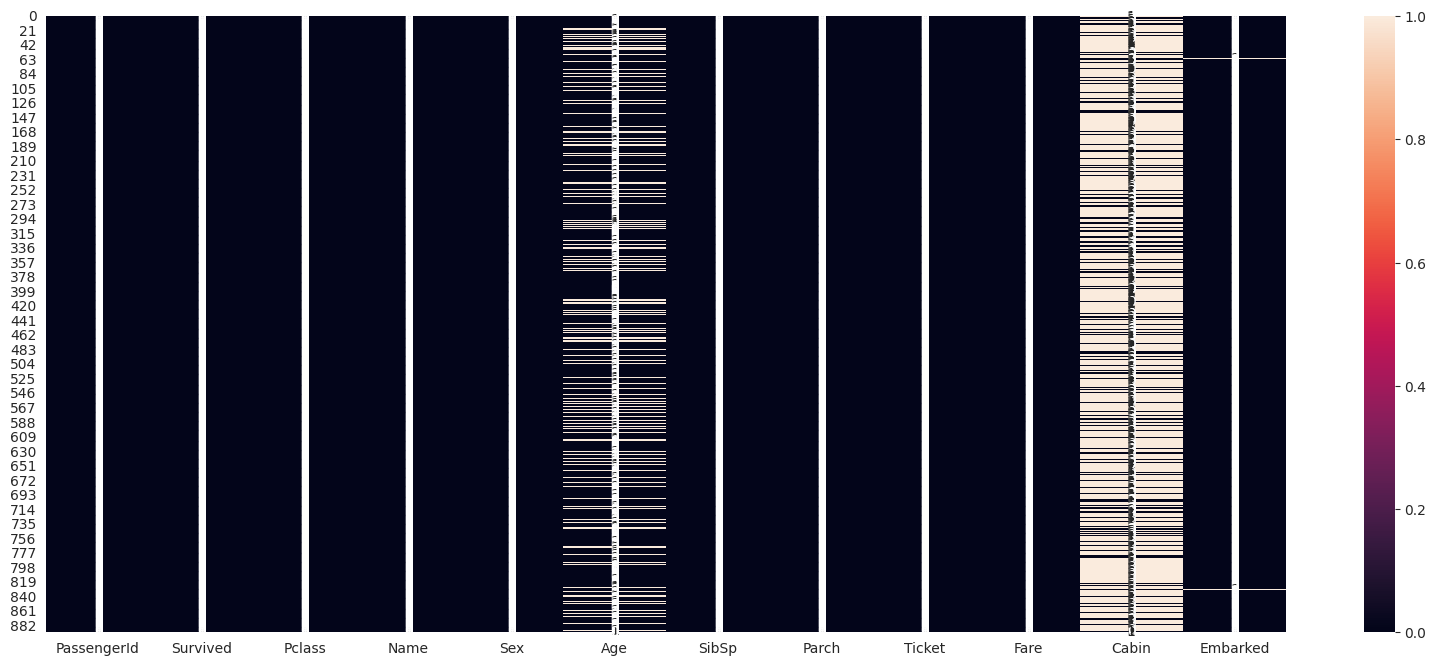

In [92]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.isnull(), annot=True)

In [93]:
(df.Age.isnull().sum()/len(df.Age))*100

19.865319865319865

In [94]:
(df.Embarked.isnull().sum()/len(df.Embarked))*100

0.22446689113355783

In [95]:
(df.Cabin.isnull().sum()/len(df.Cabin))*100

77.10437710437711

In [96]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Dropping the Unnecessary columns which do not affect the result.

In [97]:
df.drop('Cabin', axis=1, inplace=True)

In [98]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [99]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


here there are only two null values, so drop these rows we have to do hypothesis test,
null hypothesis test(no relation) and alternate hypothesis(relation)

Showing Embark value where the Pclass

In [100]:
df.loc[df.Pclass==1, 'Embarked'].value_counts()

Embarked
S    127
C     85
Q      2
Name: count, dtype: int64

In [101]:
df.loc[df.Pclass==2, 'Embarked'].value_counts()

Embarked
S    164
C     17
Q      3
Name: count, dtype: int64

In [102]:
df.loc[df.Pclass==3, 'Embarked'].value_counts()

Embarked
S    353
Q     72
C     66
Name: count, dtype: int64

here there is no relation classes with Embark, so null hypothesis.

In [103]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Replacing the NaN values

In [104]:
df.Age.mean()

29.69911764705882

In [105]:
df.Age.median()

28.0

In [106]:
df.Age.mode()

0    24.0
Name: Age, dtype: float64

How to replace NaN values?
Mean,
Median or
Mode

<Axes: ylabel='Age'>

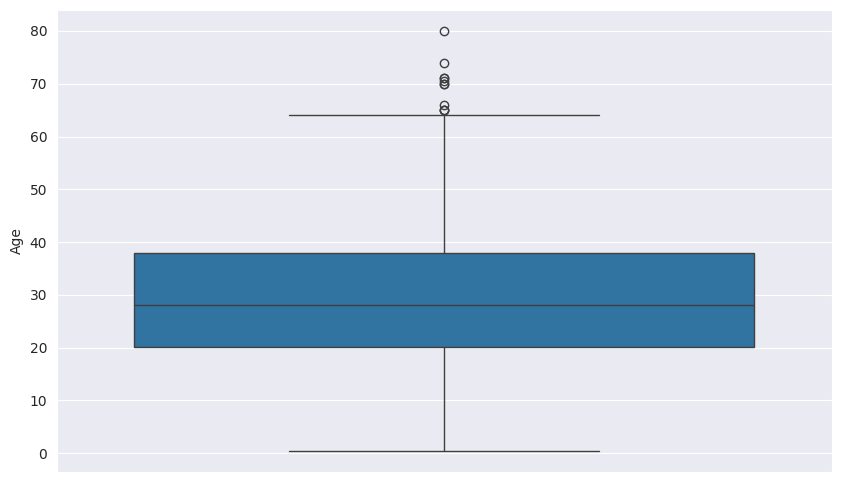

In [107]:
plt.figure(figsize=(10, 6))
sns.boxplot(df.Age)

Note while data have outliers, and you want to fill NaN values dont use mean as it also count outliers.

In [108]:
df.Age.value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

Here 24 has occurred only 30 times from the 891 times, so we can not just fill NaN values with mode value

# Using median as it gives somewhat good result

In [109]:
df['Age'].fillna(value=df.Age.median(), inplace=True)

In [110]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [111]:
df.dropna(inplace=True)

In [112]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [113]:
df.shape

(889, 11)

Dropping the columns which does not help to predict the passengers survival

In [114]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [115]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: xlabel='Sex'>

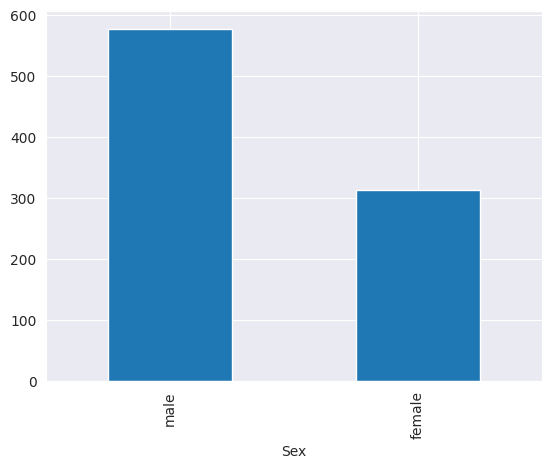

In [116]:
df.Sex.value_counts().plot(kind='bar')

<Axes: xlabel='Survived'>

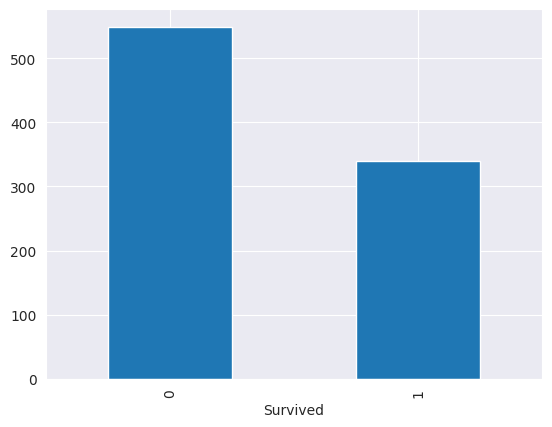

In [117]:
df.Survived.value_counts().plot(kind='bar')

most of the people does not survive

Number of male and female survived

<Axes: xlabel='Survived', ylabel='count'>

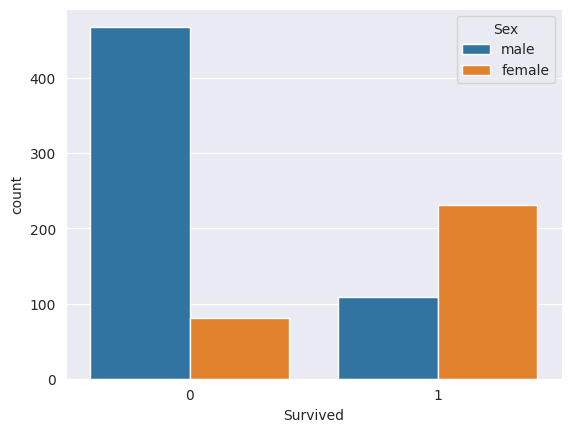

In [118]:
sns.countplot(x='Survived', data=df, hue='Sex')

<Axes: xlabel='Pclass'>

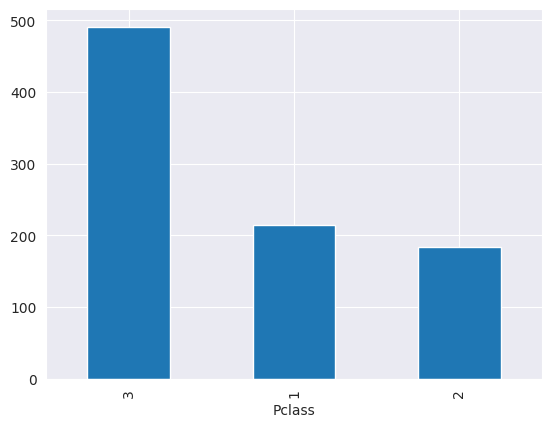

In [119]:
df.Pclass.value_counts().plot(kind='bar')

In [120]:
from sklearn.preprocessing import LabelEncoder

In [121]:
enc = LabelEncoder()

In [122]:
df.Sex = enc.fit_transform(df.Sex)

In [123]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [124]:
df.Age = df.Age.astype(int)

In [125]:
df.Age

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    28
889    26
890    32
Name: Age, Length: 889, dtype: int64

In [126]:
df.Fare = round(df.Fare, 2)

In [127]:
df.Fare

0       7.25
1      71.28
2       7.92
3      53.10
4       8.05
       ...  
886    13.00
887    30.00
888    23.45
889    30.00
890     7.75
Name: Fare, Length: 889, dtype: float64

In [128]:
from sklearn.preprocessing import OneHotEncoder

In [129]:
one_enc = OneHotEncoder()

In [130]:
df_copy = df.copy()

In [131]:
df_copy = pd.get_dummies(df_copy.Embarked).astype(int)

In [132]:
df_copy.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [133]:
df = pd.concat([df, df_copy], axis=1)

In [134]:
df.drop(['Embarked', 'C'], axis=1, inplace=True)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    int64  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Q         889 non-null    int64  
 8   S         889 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 69.5 KB


<Axes: >

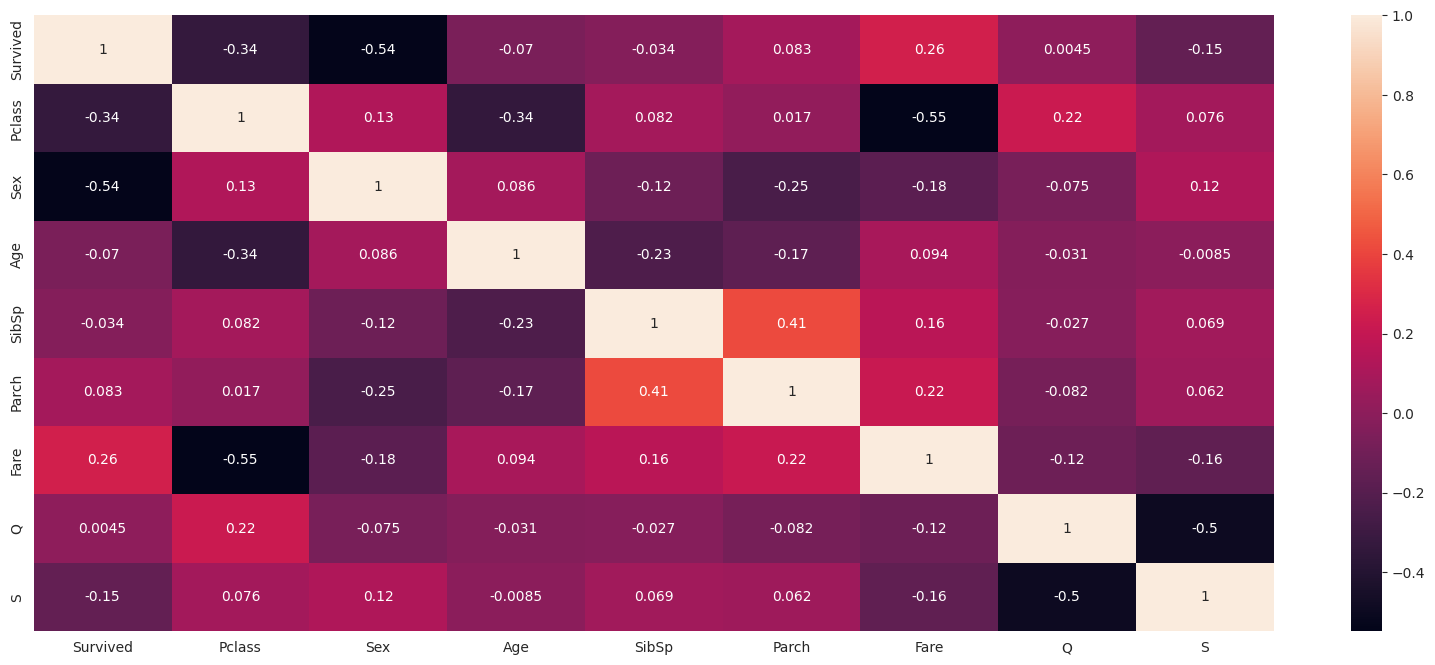

In [136]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True)

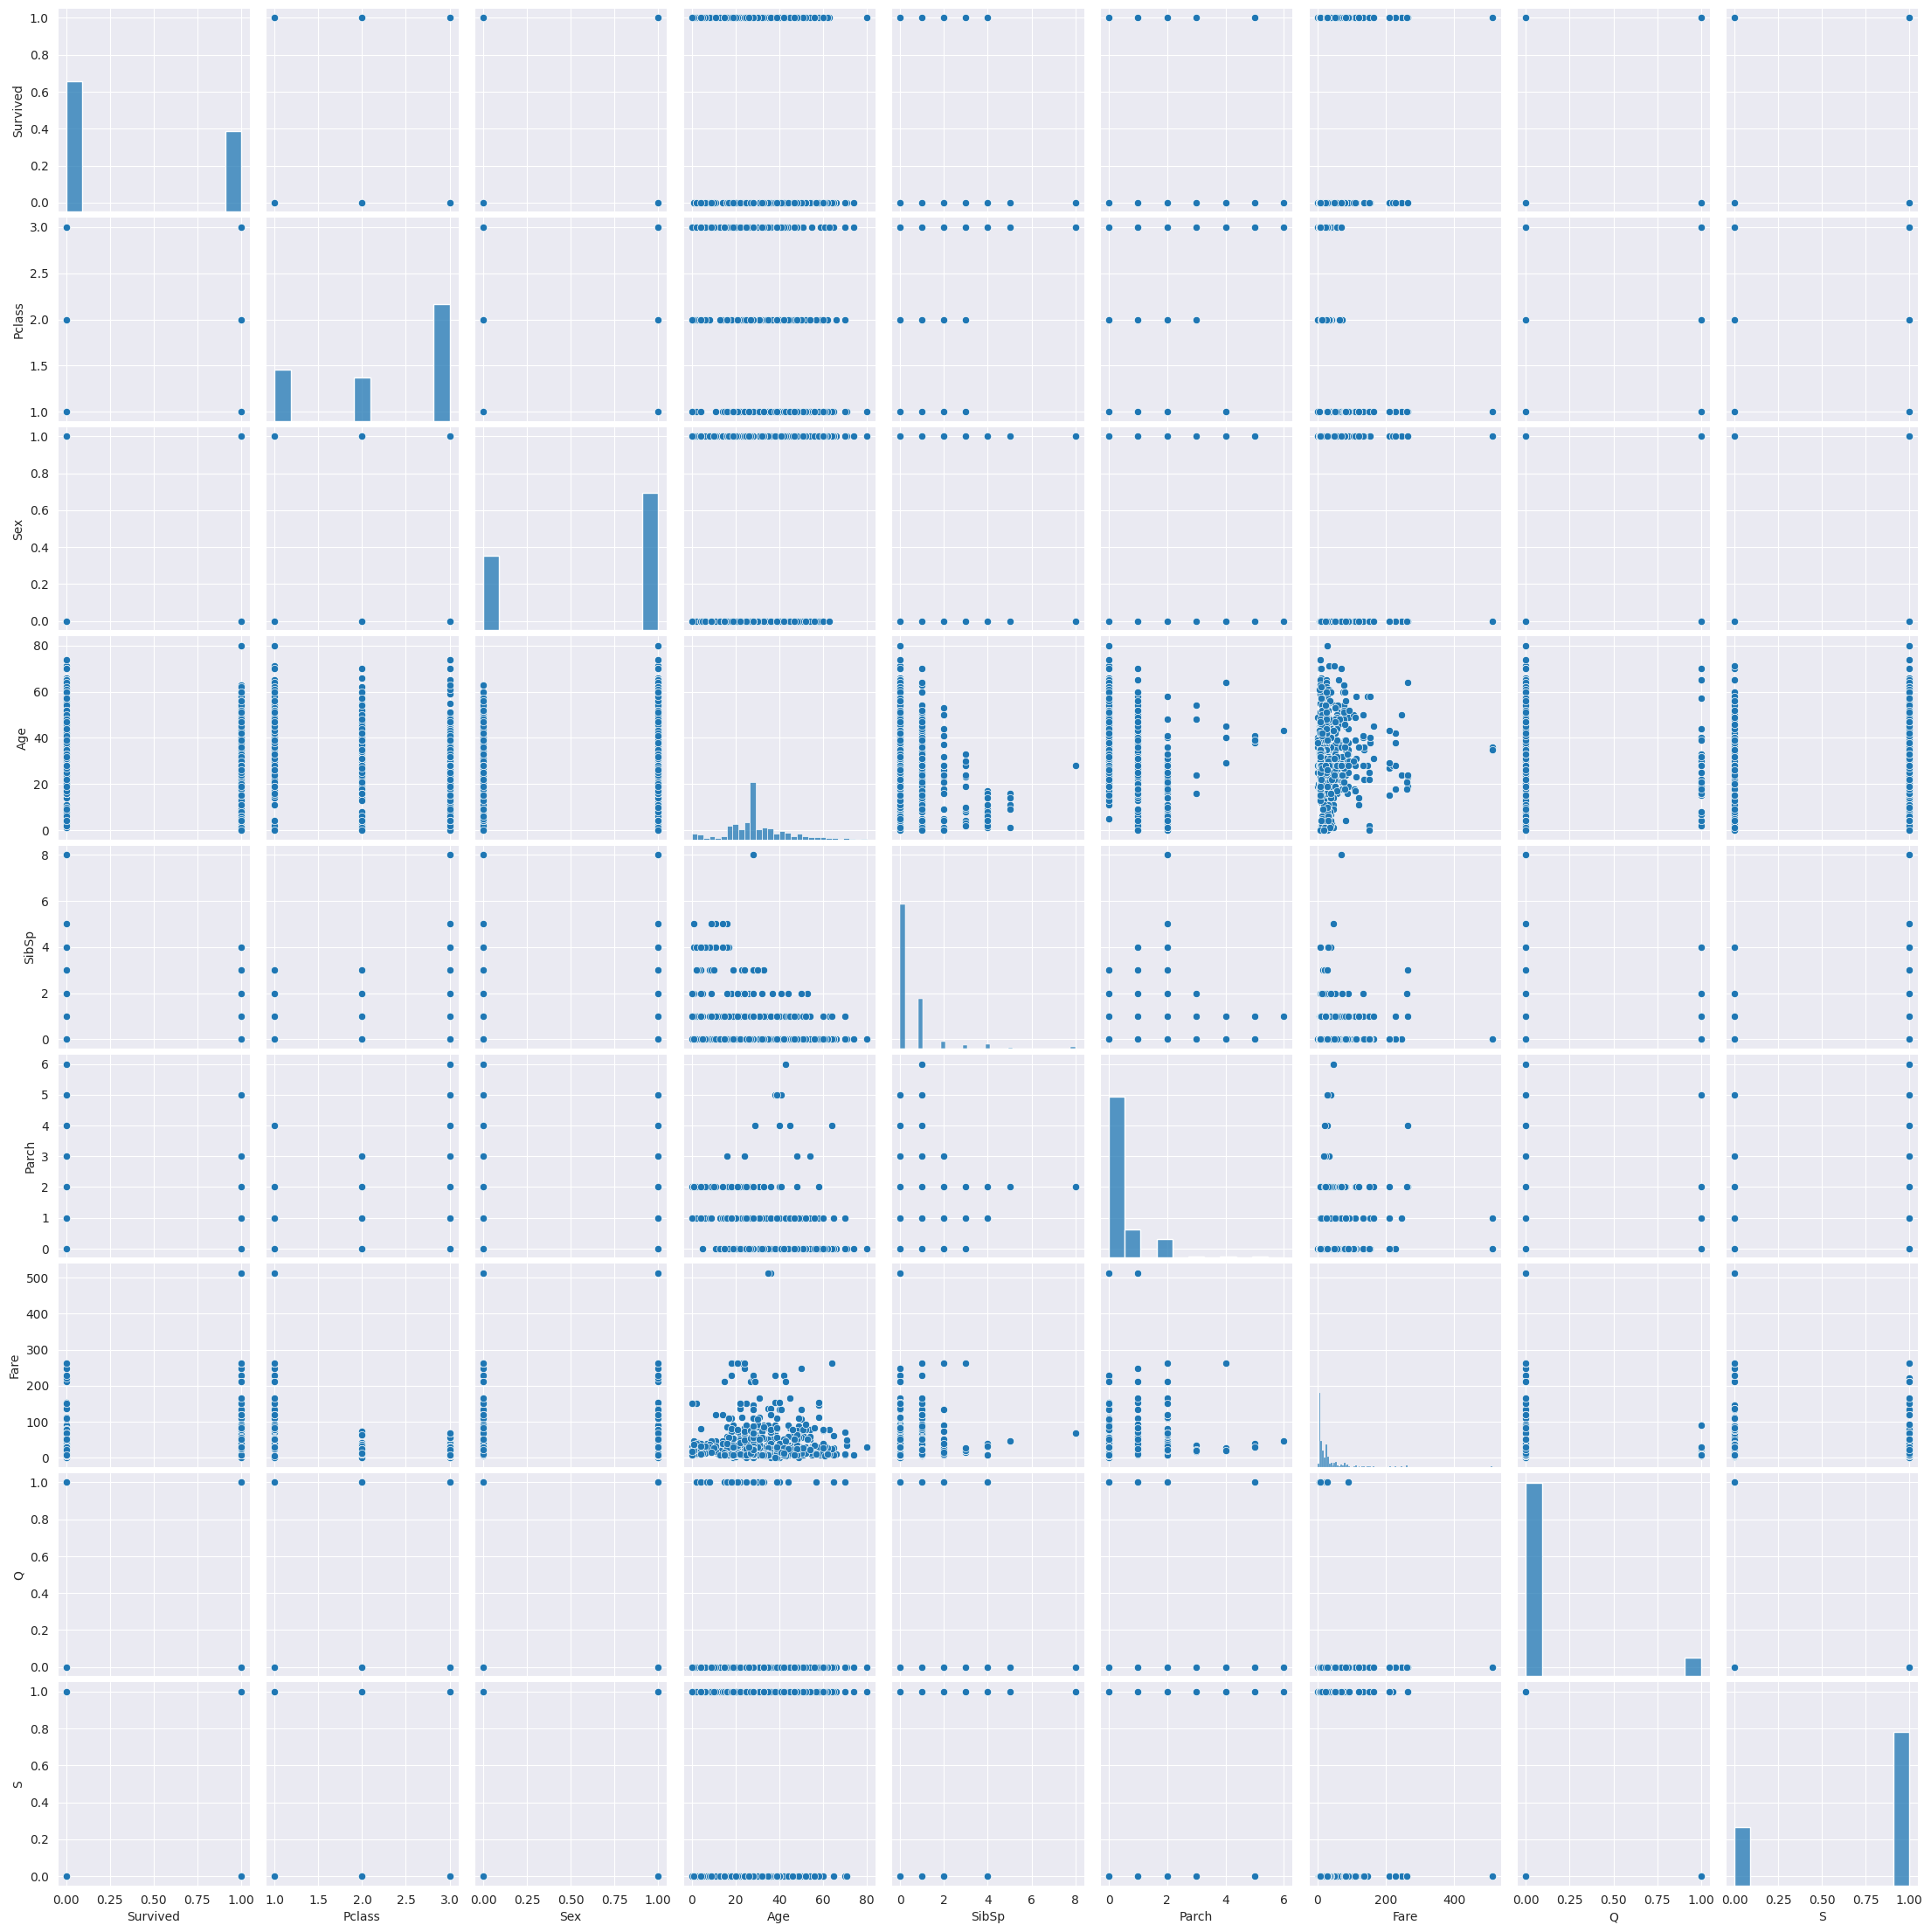

In [137]:
sns.pairplot(df)

# Feature Importance

In [138]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [139]:
from sklearn.ensemble import ExtraTreesClassifier

In [140]:
feat = ExtraTreesClassifier()

In [141]:
feat.fit(x, y)

ExtraTreesClassifier()

<Axes: >

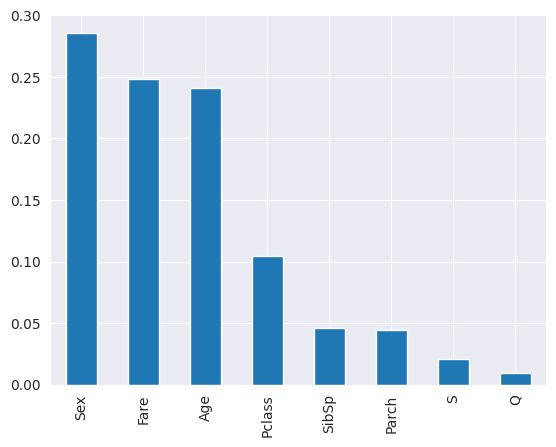

In [142]:
feat_imp = pd.Series(feat.feature_importances_, index=x.columns)
feat_imp.nlargest(8).plot(kind='bar')

In [143]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.25,0,1
1,1,1,0,38,1,0,71.28,0,0
2,1,3,0,26,0,0,7.92,0,1
3,1,1,0,35,1,0,53.10,0,1
4,0,3,1,35,0,0,8.05,0,1


Splitting the Data

In [144]:
skf = StratifiedKFold(n_splits=10)

In [145]:
for train_index, test_index in skf.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Model Selection

In [146]:
classifier = LogisticRegression()

In [147]:
classifier.fit(x_train, y_train)

/home/bhavin/DataspellProjects/Data-Scientist-Industrial-Training/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [148]:
y_pred = classifier.predict(x_test)

In [149]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [150]:
result.head()

,Actual,Predicted
797,1,1
801,1,1
802,1,1
803,1,0
804,1,0


<Axes: >

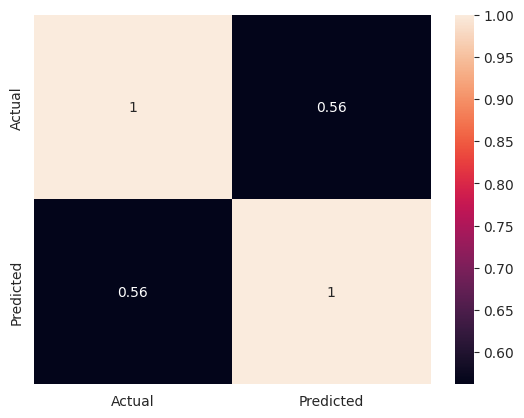

In [151]:
sns.heatmap(result.corr(), annot=True)

# Performance Matrix

In [152]:
confusion_matrix(y_test, y_pred)

array([[47,  7],
       [11, 23]])

In [153]:
accuracy = (47+23)/88
accuracy

0.7954545454545454

In [154]:
accuracy_score(y_test, y_pred)

0.7954545454545454

In [155]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.87      0.84        54\n           1       0.77      0.68      0.72        34\n\n    accuracy                           0.80        88\n   macro avg       0.79      0.77      0.78        88\nweighted avg       0.79      0.80      0.79        88\n'

In [156]:
import pickle

In [157]:
save_model = pickle.dumps(classifier)

In [ ]:
unpickle = pickle.loads(save_model)